In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1524,1656-DRSMG,Female,0,No,No,63,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),109.85,7002.95,No
3688,5312-UXESG,Female,0,No,No,41,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),98.05,3990.6,No
2712,5133-VRSAB,Male,0,No,No,8,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.35,216.45,No
2421,3893-JRNFS,Male,0,No,No,68,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),39.90,2796.35,No
4774,7402-PWYJJ,Female,0,Yes,No,53,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,One year,Yes,Electronic check,91.15,4862.5,No


In [3]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values #find out why total charges is object instead of int

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
#pd.to_numeric(df.TotalCharges) here found that some cells are empty

In [7]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull() #ignore error

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()] #serve as index False (not empty)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.shape

(7043, 20)

In [10]:
df.iloc[488]['TotalCharges']

' '

In [11]:
df1 = df[df.TotalCharges!=' '] #drop those that are empty
df1.shape

(7032, 20)

In [12]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\kwanm\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
df1.TotalCharges.dtypes

dtype('float64')

In [14]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


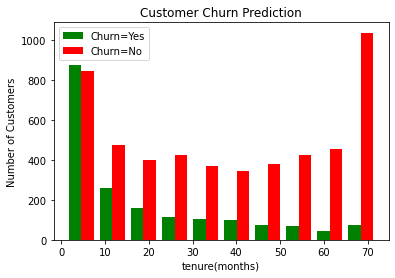

In [15]:
#churn means leave or not
#tenure menas time of staying
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('tenure(months)')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

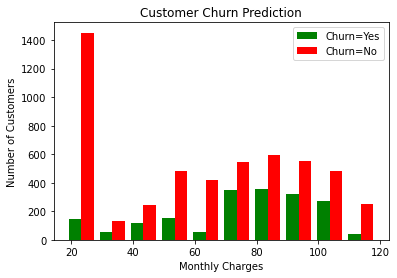

In [16]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')
plt.hist([mc_churn_yes,mc_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [17]:
def print_unique_col_values(df):
    for col in df:
        if df[col].dtypes=='object':
            print(f'{col}: {df[col].unique()}')

In [18]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [19]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

C:\Users\kwanm\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [20]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [21]:
yes_no_cols = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_cols:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\kwanm\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [22]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [23]:
df1['gender'].replace({'Male':1,'Female':0},inplace=True)

In [24]:
print_unique_col_values(df1)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [25]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [26]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5926,1,0,0,0,6,1,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
2728,0,0,0,0,25,0,0,1,1,1,...,1,0,0,0,1,0,0,0,1,0
4397,0,0,1,0,72,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
1685,1,1,1,0,27,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
356,0,1,0,0,16,1,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [27]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [28]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

df2[cols_to_scale] = sc.fit_transform(df2[cols_to_scale])

In [29]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3508,0,0,0,0,0.971831,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
5623,1,0,0,0,0.549296,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1068,1,0,1,0,0.676056,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
4387,1,0,0,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
5169,1,0,0,1,0.197183,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1


In [30]:
#all the above is to convert all data into int

In [31]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [33]:
len(x_train.columns)

26

In [34]:
with tf.device('/CPU:0'):
    model = keras.Sequential([
        keras.layers.Dense(20,input_shape=(26,),activation='relu'), #only first layer need to know input shape
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5496 - accuracy: 0.7409
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4423 - accuracy: 0.7818
Epoch 3/100
176/176 [==============================] - 0s 533us/step - loss: 0.4135 - accuracy: 0.8078
Epoch 4/100
176/176 [==============================] - 0s 531us/step - loss: 0.4227 - accuracy: 0.7974
Epoch 5/100
176/176 [==============================] - 0s 530us/step - loss: 0.4035 - accuracy: 0.8122
Epoch 6/100
176/176 [==============================] - 0s 541us/step - loss: 0.4117 - accuracy: 0.8110
Epoch 7/100
176/176 [==============================] - 0s 533us/step - loss: 0.4114 - accuracy: 0.8065
Epoch 8/100
176/176 [==============================] - 0s 525us/step - loss: 0.4095 - accuracy: 0.8070
Epoch 9/100
176/176 [==============================] - 0s 534us/step - loss: 0.4036 - accuracy: 0.8149
Epoch 10/100
176/176 [==============================] - 0s 537us/step - loss:

176/176 [==============================] - 0s 601us/step - loss: 0.3763 - accuracy: 0.8243
Epoch 80/100
176/176 [==============================] - 0s 595us/step - loss: 0.3596 - accuracy: 0.8328
Epoch 81/100
176/176 [==============================] - 0s 554us/step - loss: 0.3708 - accuracy: 0.8273
Epoch 82/100
176/176 [==============================] - 0s 553us/step - loss: 0.3689 - accuracy: 0.8288
Epoch 83/100
176/176 [==============================] - 0s 624us/step - loss: 0.3749 - accuracy: 0.8236
Epoch 84/100
176/176 [==============================] - 0s 628us/step - loss: 0.3696 - accuracy: 0.8233
Epoch 85/100
176/176 [==============================] - 0s 607us/step - loss: 0.3576 - accuracy: 0.8309
Epoch 86/100
176/176 [==============================] - 0s 599us/step - loss: 0.3632 - accuracy: 0.8286
Epoch 87/100
176/176 [==============================] - 0s 584us/step - loss: 0.3639 - accuracy: 0.8318
Epoch 88/100
176/176 [==============================] - 0s 599us/step - loss:

In [35]:
with tf.device('/CPU:0'):
    model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 487us/step - loss: 0.4786 - accuracy: 0.7754


In [36]:
with tf.device('/CPU:0'):
    yp = model.predict(x_test)
yp[:5]

array([[0.18902394],
       [0.45505434],
       [0.0088203 ],
       [0.7485963 ],
       [0.55276096]], dtype=float32)

In [37]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [38]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:5]

[0, 0, 0, 1, 1]

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       999
           1       0.64      0.52      0.58       408

    accuracy                           0.78      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(69.0, 0.5, 'Truth')

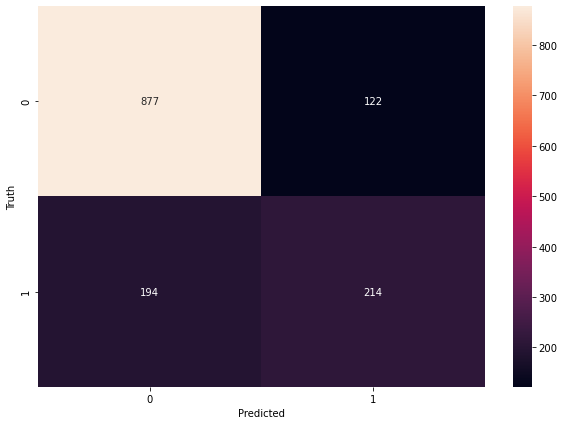

In [40]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
accuracy = round((893+203)/(893+203+106+205),2)
accuracy

0.78

In [42]:
#precision = TP/(TP+FP)
#recall = TP/(TP+FN)

In [43]:
def ANN(x_train,y_train,x_test,y_test,loss,weight):
    model = keras.Sequential([
        keras.layers.Dense(20,input_shape=(26,),activation='relu'), #only first layer need to know input shape
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss=loss,
                 metrics=['accuracy'])
    if weight == -1:
        model.fit(x_train,y_train,epochs=100)
    else:
        model.fit(x_train,y_train,epochs=100,class_weight=weight)
        
    print(model.evaluate(x_test,y_test))
    
    y_pred = np.round(model.predict(x_test))
    
    print('Classification Report: \n', classification_report(y_test,y_pred))
    
    return(y_pred)

In [44]:
with tf.device('/CPU:0'):
    y_pred = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 0s 524us/step - loss: 0.5527 - accuracy: 0.7311
Epoch 2/100
176/176 [==============================] - 0s 707us/step - loss: 0.4366 - accuracy: 0.7848
Epoch 3/100
176/176 [==============================] - 0s 764us/step - loss: 0.4274 - accuracy: 0.7872
Epoch 4/100
176/176 [==============================] - 0s 637us/step - loss: 0.4050 - accuracy: 0.8073
Epoch 5/100
176/176 [==============================] - 0s 718us/step - loss: 0.4065 - accuracy: 0.8092
Epoch 6/100
176/176 [==============================] - 0s 576us/step - loss: 0.4237 - accuracy: 0.7981
Epoch 7/100
176/176 [==============================] - 0s 644us/step - loss: 0.4028 - accuracy: 0.8096
Epoch 8/100
176/176 [==============================] - 0s 633us/step - loss: 0.4194 - accuracy: 0.8034
Epoch 9/100
176/176 [==============================] - 0s 712us/step - loss: 0.3982 - accuracy: 0.8154
Epoch 10/100
176/176 [==============================] - 0s 638us/step - l

176/176 [==============================] - 0s 559us/step - loss: 0.3603 - accuracy: 0.8313
Epoch 80/100
176/176 [==============================] - 0s 524us/step - loss: 0.3599 - accuracy: 0.8357
Epoch 81/100
176/176 [==============================] - 0s 621us/step - loss: 0.3703 - accuracy: 0.8255
Epoch 82/100
176/176 [==============================] - 0s 533us/step - loss: 0.3655 - accuracy: 0.8314
Epoch 83/100
176/176 [==============================] - 0s 690us/step - loss: 0.3710 - accuracy: 0.8188
Epoch 84/100
176/176 [==============================] - 0s 774us/step - loss: 0.3628 - accuracy: 0.82940s - loss: 0.3620 - accuracy: 0.83
Epoch 85/100
176/176 [==============================] - 0s 906us/step - loss: 0.3670 - accuracy: 0.8276
Epoch 86/100
176/176 [==============================] - 0s 604us/step - loss: 0.3653 - accuracy: 0.8237
Epoch 87/100
176/176 [==============================] - 0s 687us/step - loss: 0.3598 - accuracy: 0.8318
Epoch 88/100
176/176 [=====================

# Undersampling 

In [45]:
#class count
count_class_0, count_class_1 = df1.Churn.value_counts()

#divide by class
df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [46]:
df_class_0.shape, df_class_1.shape

((5163, 27), (1869, 27))

In [47]:
count_class_0, count_class_1

(5163, 1869)

In [48]:
df_class_0_under = df_class_0.sample(count_class_1) #undersample the larger one

df_test_under = pd.concat([df_class_0_under, df_class_1],axis=0)
df_test_under.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5966,1,0,1,0,0.577465,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
2152,0,0,0,0,0.000000,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1594,0,0,0,1,0.859155,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4585,0,1,0,0,0.000000,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1984,0,0,1,1,0.183099,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0


In [49]:
df_test_under.Churn.value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [50]:
x_under = df_test_under.drop('Churn',axis='columns')
y_under = df_test_under['Churn']
x_train_under,x_test_under,y_train_under,y_test_under = train_test_split(x_under,y_under,test_size=0.2,random_state=15,stratify=y_under)#'stratify' make sure hv balanced sample

In [51]:
with tf.device('/CPU:0'):
    y_pred_under = ANN(x_train_under,y_train_under,x_test_under,y_test_under,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 0s 686us/step - loss: 0.6596 - accuracy: 0.6184
Epoch 2/100
94/94 [==============================] - 0s 740us/step - loss: 0.5362 - accuracy: 0.7472
Epoch 3/100
94/94 [==============================] - 0s 686us/step - loss: 0.5064 - accuracy: 0.7519
Epoch 4/100
94/94 [==============================] - 0s 751us/step - loss: 0.5029 - accuracy: 0.7556
Epoch 5/100
94/94 [==============================] - 0s 740us/step - loss: 0.4748 - accuracy: 0.7743
Epoch 6/100
94/94 [==============================] - 0s 708us/step - loss: 0.4550 - accuracy: 0.7859
Epoch 7/100
94/94 [==============================] - 0s 729us/step - loss: 0.4761 - accuracy: 0.7713
Epoch 8/100
94/94 [==============================] - 0s 772us/step - loss: 0.4606 - accuracy: 0.7792
Epoch 9/100
94/94 [==============================] - 0s 634us/step - loss: 0.4751 - accuracy: 0.7643
Epoch 10/100
94/94 [==============================] - 0s 643us/step - loss: 0.4701 - accura

94/94 [==============================] - 0s 611us/step - loss: 0.3969 - accuracy: 0.8165
Epoch 82/100
94/94 [==============================] - 0s 568us/step - loss: 0.4059 - accuracy: 0.8067
Epoch 83/100
94/94 [==============================] - 0s 525us/step - loss: 0.4157 - accuracy: 0.8062
Epoch 84/100
94/94 [==============================] - 0s 504us/step - loss: 0.3944 - accuracy: 0.8250
Epoch 85/100
94/94 [==============================] - 0s 639us/step - loss: 0.4008 - accuracy: 0.8178
Epoch 86/100
94/94 [==============================] - 0s 601us/step - loss: 0.4172 - accuracy: 0.8075
Epoch 87/100
94/94 [==============================] - 0s 586us/step - loss: 0.4147 - accuracy: 0.8026
Epoch 88/100
94/94 [==============================] - 0s 536us/step - loss: 0.4075 - accuracy: 0.8133
Epoch 89/100
94/94 [==============================] - 0s 579us/step - loss: 0.4073 - accuracy: 0.8182
Epoch 90/100
94/94 [==============================] - 0s 676us/step - loss: 0.4122 - accuracy: 

# Oversampling 

In [52]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)#oversample the smaller one

df_test_over = pd.concat([df_class_0, df_class_1_over],axis=0)
df_test_over.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2960,1,0,0,0,0.295775,1,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4091,0,0,0,0,0.267606,1,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
8,0,0,1,0,0.380282,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5649,0,0,1,0,0.450704,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3995,1,0,0,1,0.380282,1,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0


In [53]:
x_over = df_test_over.drop('Churn',axis='columns')
y_over = df_test_over['Churn']
x_train_over,x_test_over,y_train_over,y_test_over = train_test_split(x_over,y_over,test_size=0.2,random_state=15,stratify=y_over)

In [54]:
y_train_over.value_counts(),y_test_over.value_counts()

(1    4130
 0    4130
 Name: Churn, dtype: int64,
 1    1033
 0    1033
 Name: Churn, dtype: int64)

In [55]:
with tf.device('/CPU:0'):
    y_pred_over = ANN(x_train_over,y_train_over,x_test_over,y_test_over,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 623us/step - loss: 0.6123 - accuracy: 0.6584
Epoch 2/100
259/259 [==============================] - 0s 660us/step - loss: 0.5039 - accuracy: 0.7523
Epoch 3/100
259/259 [==============================] - 0s 666us/step - loss: 0.4797 - accuracy: 0.7716
Epoch 4/100
259/259 [==============================] - 0s 676us/step - loss: 0.4748 - accuracy: 0.7701
Epoch 5/100
259/259 [==============================] - 0s 692us/step - loss: 0.4740 - accuracy: 0.7723
Epoch 6/100
259/259 [==============================] - 0s 762us/step - loss: 0.4711 - accuracy: 0.7778
Epoch 7/100
259/259 [==============================] - 0s 715us/step - loss: 0.4709 - accuracy: 0.7791
Epoch 8/100
259/259 [==============================] - 0s 611us/step - loss: 0.4635 - accuracy: 0.7817
Epoch 9/100
259/259 [==============================] - 0s 593us/step - loss: 0.4643 - accuracy: 0.7742
Epoch 10/100
259/259 [==============================] - 0s 541us/step - l

259/259 [==============================] - 0s 524us/step - loss: 0.3987 - accuracy: 0.8197
Epoch 80/100
259/259 [==============================] - 0s 510us/step - loss: 0.3851 - accuracy: 0.8243
Epoch 81/100
259/259 [==============================] - 0s 551us/step - loss: 0.4007 - accuracy: 0.8183
Epoch 82/100
259/259 [==============================] - 0s 524us/step - loss: 0.3851 - accuracy: 0.8277
Epoch 83/100
259/259 [==============================] - 0s 510us/step - loss: 0.3876 - accuracy: 0.8314
Epoch 84/100
259/259 [==============================] - 0s 512us/step - loss: 0.3847 - accuracy: 0.8250
Epoch 85/100
259/259 [==============================] - 0s 532us/step - loss: 0.3821 - accuracy: 0.8298
Epoch 86/100
259/259 [==============================] - 0s 492us/step - loss: 0.3883 - accuracy: 0.8268
Epoch 87/100
259/259 [==============================] - 0s 518us/step - loss: 0.3844 - accuracy: 0.8270
Epoch 88/100
259/259 [==============================] - 0s 520us/step - loss:

### SMOTE  #Synthetic Minority Oversampling Technique

In [56]:
x_smote = df2.drop('Churn',axis='columns')
y_smote = df2['Churn']

In [57]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

In [58]:
x_sm,y_sm = smote.fit_resample(x_smote,y_smote)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [59]:
x_train_sm,x_test_sm,y_train_sm,y_test_sm = train_test_split(x_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)

In [60]:
with tf.device('/CPU:0'):
    y_pred_sm = ANN(x_train_sm,y_train_sm,x_test_sm,y_test_sm,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 793us/step - loss: 0.6412 - accuracy: 0.6198
Epoch 2/100
259/259 [==============================] - 0s 713us/step - loss: 0.4820 - accuracy: 0.7719
Epoch 3/100
259/259 [==============================] - 0s 692us/step - loss: 0.4586 - accuracy: 0.7792
Epoch 4/100
259/259 [==============================] - 0s 556us/step - loss: 0.4596 - accuracy: 0.7892
Epoch 5/100
259/259 [==============================] - 0s 546us/step - loss: 0.4537 - accuracy: 0.7912
Epoch 6/100
259/259 [==============================] - 0s 568us/step - loss: 0.4515 - accuracy: 0.7915
Epoch 7/100
259/259 [==============================] - 0s 549us/step - loss: 0.4530 - accuracy: 0.7886
Epoch 8/100
259/259 [==============================] - 0s 531us/step - loss: 0.4492 - accuracy: 0.7860
Epoch 9/100
259/259 [==============================] - 0s 537us/step - loss: 0.4473 - accuracy: 0.7925
Epoch 10/100
259/259 [==============================] - 0s 546us/step - l

259/259 [==============================] - 0s 535us/step - loss: 0.3512 - accuracy: 0.8441
Epoch 80/100
259/259 [==============================] - 0s 511us/step - loss: 0.3589 - accuracy: 0.8377
Epoch 81/100
259/259 [==============================] - 0s 490us/step - loss: 0.3573 - accuracy: 0.8412
Epoch 82/100
259/259 [==============================] - 0s 479us/step - loss: 0.3570 - accuracy: 0.8434
Epoch 83/100
259/259 [==============================] - 0s 502us/step - loss: 0.3474 - accuracy: 0.8467
Epoch 84/100
259/259 [==============================] - 0s 486us/step - loss: 0.3575 - accuracy: 0.8382
Epoch 85/100
259/259 [==============================] - 0s 479us/step - loss: 0.3598 - accuracy: 0.8429
Epoch 86/100
259/259 [==============================] - 0s 502us/step - loss: 0.3518 - accuracy: 0.8450
Epoch 87/100
259/259 [==============================] - 0s 492us/step - loss: 0.3485 - accuracy: 0.8477
Epoch 88/100
259/259 [==============================] - 0s 564us/step - loss:

# Use of Ensemble with Undersampling

In [61]:
x_en = df2.drop('Churn',axis='columns')
y_en = df2['Churn']

In [62]:
x_train_en,x_test_en,y_train_en,y_test_en = train_test_split(x_en,y_en,test_size=0.2,random_state=15,stratify=y_en)

In [63]:
y_train_en.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [64]:
4130/1495

2.762541806020067

In [65]:
df3 = x_train_en.copy()
df3['Churn'] = y_train_en

In [66]:
df3_class_0 = df3[df3['Churn']==0]
df3_class_1 = df3[df3['Churn']==1]

In [67]:
df3_class_0.shape,df3_class_1.shape

((4130, 27), (1495, 27))

In [72]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train_en = pd.concat([df_majority[start:end],df_minority],axis=0)
    x_train_en = df_train_en.drop('Churn',axis='columns')
    y_train_en = df_train_en.Churn
    return x_train_en,y_train_en

In [73]:
x_train_en_1, y_train_en_1 = get_train_batch(df3_class_0,df3_class_1,0,1495)
x_train_en_2, y_train_en_2 = get_train_batch(df3_class_0,df3_class_1,1495,2990)
x_train_en_3, y_train_en_3 = get_train_batch(df3_class_0,df3_class_1,2990,4130)

In [74]:
with tf.device('/CPU:0'):
    y_pred_en_1 = ANN(x_train_en_1,y_train_en_1,x_test_en,y_test_en,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 0s 529us/step - loss: 0.6424 - accuracy: 0.6460
Epoch 2/100
94/94 [==============================] - 0s 529us/step - loss: 0.5280 - accuracy: 0.7538
Epoch 3/100
94/94 [==============================] - 0s 535us/step - loss: 0.5143 - accuracy: 0.7472
Epoch 4/100
94/94 [==============================] - 0s 502us/step - loss: 0.4771 - accuracy: 0.7731
Epoch 5/100
94/94 [==============================] - 0s 530us/step - loss: 0.4788 - accuracy: 0.7712
Epoch 6/100
94/94 [==============================] - 0s 531us/step - loss: 0.4979 - accuracy: 0.7559
Epoch 7/100
94/94 [==============================] - 0s 499us/step - loss: 0.4848 - accuracy: 0.7632
Epoch 8/100
94/94 [==============================] - 0s 516us/step - loss: 0.4744 - accuracy: 0.7776
Epoch 9/100
94/94 [==============================] - 0s 504us/step - loss: 0.4758 - accuracy: 0.7742
Epoch 10/100
94/94 [==============================] - 0s 507us/step - loss: 0.4806 - accura

94/94 [==============================] - 0s 549us/step - loss: 0.4345 - accuracy: 0.8002
Epoch 82/100
94/94 [==============================] - 0s 536us/step - loss: 0.4215 - accuracy: 0.8006
Epoch 83/100
94/94 [==============================] - 0s 525us/step - loss: 0.4299 - accuracy: 0.8002
Epoch 84/100
94/94 [==============================] - 0s 521us/step - loss: 0.4072 - accuracy: 0.8153
Epoch 85/100
94/94 [==============================] - 0s 516us/step - loss: 0.4265 - accuracy: 0.7987
Epoch 86/100
94/94 [==============================] - 0s 523us/step - loss: 0.4408 - accuracy: 0.7910
Epoch 87/100
94/94 [==============================] - 0s 534us/step - loss: 0.4442 - accuracy: 0.7987
Epoch 88/100
94/94 [==============================] - 0s 515us/step - loss: 0.4116 - accuracy: 0.8100
Epoch 89/100
94/94 [==============================] - 0s 537us/step - loss: 0.4225 - accuracy: 0.8078
Epoch 90/100
94/94 [==============================] - 0s 527us/step - loss: 0.4225 - accuracy: 

In [75]:
with tf.device('/CPU:0'):
    y_pred_en_2 = ANN(x_train_en_2,y_train_en_2,x_test_en,y_test_en,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 0s 533us/step - loss: 0.6829 - accuracy: 0.5374
Epoch 2/100
94/94 [==============================] - 0s 519us/step - loss: 0.5539 - accuracy: 0.7341
Epoch 3/100
94/94 [==============================] - 0s 513us/step - loss: 0.4987 - accuracy: 0.7583
Epoch 4/100
94/94 [==============================] - 0s 520us/step - loss: 0.5059 - accuracy: 0.7562
Epoch 5/100
94/94 [==============================] - 0s 536us/step - loss: 0.4983 - accuracy: 0.7556
Epoch 6/100
94/94 [==============================] - 0s 510us/step - loss: 0.4933 - accuracy: 0.7636
Epoch 7/100
94/94 [==============================] - 0s 512us/step - loss: 0.4812 - accuracy: 0.7682
Epoch 8/100
94/94 [==============================] - 0s 530us/step - loss: 0.4727 - accuracy: 0.7664
Epoch 9/100
94/94 [==============================] - 0s 512us/step - loss: 0.4758 - accuracy: 0.7701
Epoch 10/100
94/94 [==============================] - 0s 514us/step - loss: 0.4762 - accura

94/94 [==============================] - 0s 508us/step - loss: 0.4190 - accuracy: 0.7899
Epoch 82/100
94/94 [==============================] - 0s 518us/step - loss: 0.4030 - accuracy: 0.8010
Epoch 83/100
94/94 [==============================] - 0s 501us/step - loss: 0.4153 - accuracy: 0.7939
Epoch 84/100
94/94 [==============================] - 0s 482us/step - loss: 0.4025 - accuracy: 0.8074
Epoch 85/100
94/94 [==============================] - 0s 534us/step - loss: 0.3862 - accuracy: 0.8207
Epoch 86/100
94/94 [==============================] - 0s 482us/step - loss: 0.4281 - accuracy: 0.7935
Epoch 87/100
94/94 [==============================] - 0s 527us/step - loss: 0.3851 - accuracy: 0.8136
Epoch 88/100
94/94 [==============================] - 0s 517us/step - loss: 0.4061 - accuracy: 0.8015
Epoch 89/100
94/94 [==============================] - 0s 508us/step - loss: 0.3920 - accuracy: 0.8126
Epoch 90/100
94/94 [==============================] - 0s 509us/step - loss: 0.4018 - accuracy: 

In [76]:
with tf.device('/CPU:0'):
    y_pred_en_3 = ANN(x_train_en_3,y_train_en_3,x_test_en,y_test_en,'binary_crossentropy',-1)

Epoch 1/100
83/83 [==============================] - 0s 555us/step - loss: 0.6791 - accuracy: 0.6019
Epoch 2/100
83/83 [==============================] - 0s 521us/step - loss: 0.5296 - accuracy: 0.7503
Epoch 3/100
83/83 [==============================] - 0s 550us/step - loss: 0.4959 - accuracy: 0.7579
Epoch 4/100
83/83 [==============================] - 0s 529us/step - loss: 0.4827 - accuracy: 0.7592
Epoch 5/100
83/83 [==============================] - 0s 550us/step - loss: 0.4914 - accuracy: 0.7533
Epoch 6/100
83/83 [==============================] - 0s 529us/step - loss: 0.4691 - accuracy: 0.7755
Epoch 7/100
83/83 [==============================] - 0s 693us/step - loss: 0.4662 - accuracy: 0.7728
Epoch 8/100
83/83 [==============================] - 0s 584us/step - loss: 0.4644 - accuracy: 0.7758
Epoch 9/100
83/83 [==============================] - 0s 562us/step - loss: 0.4871 - accuracy: 0.7724
Epoch 10/100
83/83 [==============================] - 0s 523us/step - loss: 0.4849 - accura

83/83 [==============================] - 0s 535us/step - loss: 0.4172 - accuracy: 0.8098
Epoch 82/100
83/83 [==============================] - 0s 542us/step - loss: 0.3845 - accuracy: 0.8217
Epoch 83/100
83/83 [==============================] - 0s 584us/step - loss: 0.3929 - accuracy: 0.8231
Epoch 84/100
83/83 [==============================] - 0s 505us/step - loss: 0.3869 - accuracy: 0.8115
Epoch 85/100
83/83 [==============================] - 0s 486us/step - loss: 0.3882 - accuracy: 0.8165
Epoch 86/100
83/83 [==============================] - 0s 509us/step - loss: 0.3887 - accuracy: 0.8116
Epoch 87/100
83/83 [==============================] - 0s 508us/step - loss: 0.3997 - accuracy: 0.8118
Epoch 88/100
83/83 [==============================] - 0s 576us/step - loss: 0.3832 - accuracy: 0.8287
Epoch 89/100
83/83 [==============================] - 0s 512us/step - loss: 0.3718 - accuracy: 0.8363
Epoch 90/100
83/83 [==============================] - 0s 500us/step - loss: 0.3915 - accuracy: 

In [77]:
len(y_pred_en_1),len(y_pred_en_2),len(y_pred_en_3)

(1407, 1407, 1407)

In [78]:
#majority vote
y_pred_en_final = y_pred_en_1.copy()
for i in range(len(y_pred_en_final)):
    votes = y_pred_en_1[i]+y_pred_en_2[i]+y_pred_en_3[i]
    if votes > 1:
        y_pred_en_final[i] = 1
    else:
        y_pred_en_final[i] = 0

In [81]:
print(classification_report(y_test_en,y_pred_en_final))

              precision    recall  f1-score   support

           0       0.90      0.69      0.79      1033
           1       0.49      0.80      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.75      0.69      1407
weighted avg       0.79      0.72      0.74      1407

